## Imports

In [39]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [10]:
basePage = 'http://www.trustpilot.com/review/'
reviewSite = 'www.skype.com'
mainLink = basePage + reviewSite

In [11]:
r = urllib.request.urlopen(mainLink).read()
soup = BeautifulSoup(r, "html.parser")  # lxml
review_count = soup.find("h2", class_="header--inline").text

In [32]:
num_of_reviews = int(review_count.strip().split(" ")[0].replace(",",""))
review_per_page = 20
num_of_pages = int(math.ceil(num_of_reviews/review_per_page))
outputList = []

In [33]:
for page in range(1, num_of_pages+1):
    page_url = mainLink + "?page=" + str(page)
    r = urllib.request.urlopen(page_url).read()
    soup = BeautifulSoup(r, "html.parser")  # lxml
    
    # review content size will be max 20
    review_content = soup.find_all("section", class_="review__content") 
    
    for review in review_content:
        
        title = review.find("h2", class_="review-content__title").text.strip()
        body = review.find("p", class_="review-content__text").text.strip()
        date_json = review.find("div", class_="review-content-header__dates").text
        date_raw = json.loads(date_json)["publishedDate"].split("T")[0]
        rating_raw_class = review.find("div", class_="star-rating")["class"]
        rating = rating_raw_class[1].split("-")[-1]
        outputList.append([title, body, date_raw, rating])

In [34]:
skype_df = pd.DataFrame(outputList, columns=["title", "body", "date", "rating"])

In [35]:
skype_df.shape

(1035, 4)

In [36]:
skype_df.to_csv("skypeData.csv", sep="\t", index=None)

In [40]:
skype_df = pd.read_csv("skypeData.csv", sep="\t")

## Visualization

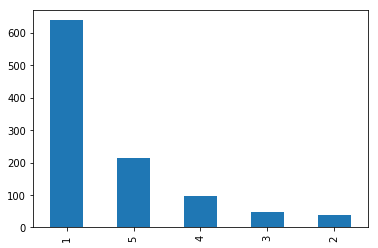

In [41]:
skype_df["rating"].value_counts().plot(kind="bar")

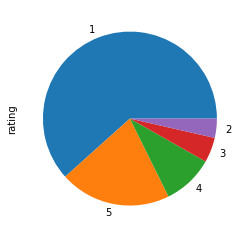

In [42]:
skype_df["rating"].value_counts().plot(kind="pie")

## Wordcloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
pos = skype_df[skype_df["rating"] >= 4]
neg = skype_df[skype_df["rating"] <= 3]

### Positive

In [45]:
pos_text = " ".join(r for r in pos["body"]) # joining all the sentences in one corpus
pos_text = pos_text.lower()

In [46]:
total_words = len(pos_text.split())
vocab_size = len(set(pos_text.split()))

print("total words in positve reviews are ", total_words)
print("unique words in positive reviews are ", vocab_size)

total words in positve reviews are  9800
unique words in positive reviews are  1917


In [47]:
stopwords = set(STOPWORDS)
print(len(stopwords))
stopwords.add("skype")  # stopwords.update will give a strange result
print(len(stopwords))  # strange !! How come the len is increased by 4

190
191


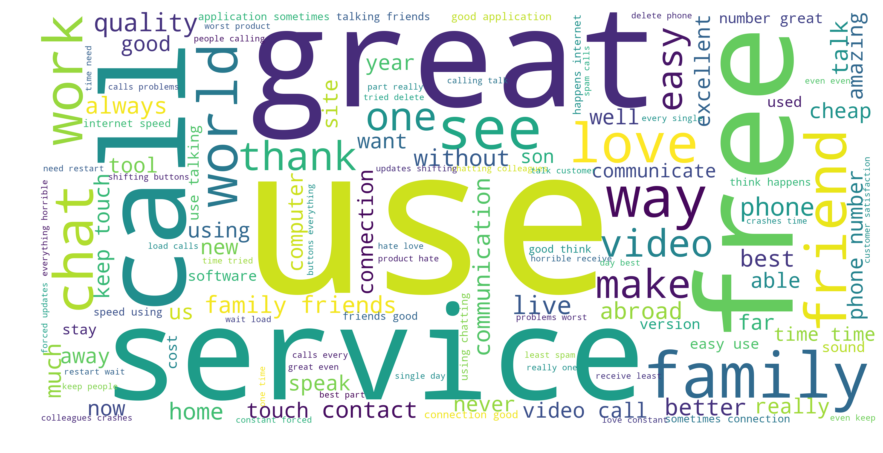

In [48]:
wordcloud = WordCloud(scale=7, stopwords=stopwords, background_color="white").generate(pos_text)
fig = plt.figure(1, figsize = (15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Negative 

In [49]:
neg_text = " ".join(r for r in neg["body"]) # joining all the sentences in one corpus
neg_text = neg_text.lower()

In [50]:
total_words = len(neg_text.split())
vocab_size = len(set(neg_text.split()))

print("total words in positve reviews are ", total_words)
print("unique words in positive reviews are ", vocab_size)

total words in positve reviews are  46206
unique words in positive reviews are  6433


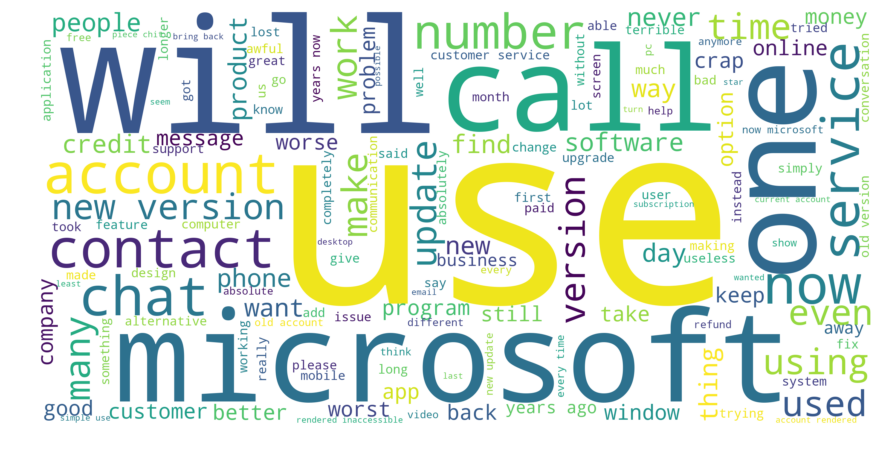

In [51]:
wordcloud = WordCloud(scale=7, stopwords=stopwords, background_color="white").generate(neg_text)
fig = plt.figure(1, figsize = (15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
skype_df.head()

,title,body,date,rating
0,Makes Windows Vista look like a…,Makes Windows Vista look like a masterpiece.Ty...,2019-05-06,1
1,All the older versions worked perfectly…,All the older versions worked perfectly but th...,2019-05-06,1
2,I've been using skype since 2008,I've been using skype since 2008. It was a gre...,2019-04-28,1
3,Account debacle,Logging into Skype has turned into a real deba...,2019-04-27,1
4,I use Skype for talking with my friends,I use Skype for talking with my friends. Very ...,2019-04-26,4
